In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os

print(tf.__version__)

2.6.2


In [6]:
import tensorflow as tf

# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# Normalize the pixel values
training_images = training_images / 255.0
test_images = test_images / 255.0

#adding batch dimention probably krunal write in flight
#training_images = tf.expand_dims(training_images, axis=-1)
#test_images = tf.expand_dims(test_images, axis=-1)

In [4]:
training_images.shape #(60000, 28, 28)
tf.expand_dims(training_images, axis=-1).shape #TensorShape([60000, 28, 28, 1])

TensorShape([60000, 28, 28, 1])

In [7]:
# Define the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Setup training parameters
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)


MODEL TRAINING:
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 128us/sample - loss: 0.4961 - accuracy: 0.8250
Epoch 2/5
60000/60000 [==============================] - 12s 194us/sample - loss: 0.3734 - accuracy: 0.8655
Epoch 3/5
60000/60000 [==============================] - 12s 198us/sample - loss: 0.3355 - accuracy: 0.8776
Epoch 4/5
60000/60000 [==============================] - 12s 201us/sample - loss: 0.3114 - accuracy: 0.8857
Epoch 5/5
60000/60000 [==============================] - 12s 192us/sample - loss: 0.2933 - accuracy: 0.8921

MODEL EVALUATION:
10000/10000 [==============================] - 1s 82us/sample - loss: 0.3426 - accuracy: 0.8781


In [8]:
# Define the model
model = tf.keras.models.Sequential([
                                                         
  # Add convolutions and max pooling
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  # Add the same layers as before
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               102528    
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

ValueError: in user code:

    C:\Users\kbged\Miniconda3\envs\base-tf\lib\site-packages\keras\engine\training.py:1330 test_function  *
        return step_function(self, iterator)
    C:\Users\kbged\Miniconda3\envs\base-tf\lib\site-packages\keras\engine\training.py:1320 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\kbged\Miniconda3\envs\base-tf\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\kbged\Miniconda3\envs\base-tf\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\kbged\Miniconda3\envs\base-tf\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\kbged\Miniconda3\envs\base-tf\lib\site-packages\keras\engine\training.py:1313 run_step  **
        outputs = model.test_step(data)
    C:\Users\kbged\Miniconda3\envs\base-tf\lib\site-packages\keras\engine\training.py:1267 test_step
        y_pred = self(x, training=False)
    C:\Users\kbged\Miniconda3\envs\base-tf\lib\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\kbged\Miniconda3\envs\base-tf\lib\site-packages\keras\engine\input_spec.py:234 assert_input_compatibility
        str(tuple(shape)))

    ValueError: Input 0 of layer sequential_4 is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: (None, 28, 28)


In [10]:
# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)


MODEL EVALUATION:
313/313 [==============================] - 4s 13ms/step - loss: 0.2572 - accuracy: 0.9088


In [11]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


[<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv2d_4')>, <KerasTensor: shape=(None, 13, 13, 32) dtype=float32 (created by layer 'max_pooling2d_4')>, <KerasTensor: shape=(None, 11, 11, 32) dtype=float32 (created by layer 'conv2d_5')>, <KerasTensor: shape=(None, 5, 5, 32) dtype=float32 (created by layer 'max_pooling2d_5')>, <KerasTensor: shape=(None, 800) dtype=float32 (created by layer 'flatten_4')>, <KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'dense_8')>, <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_9')>]
KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_4_input'), name='conv2d_4_input', description="created by layer 'conv2d_4_input'")
7


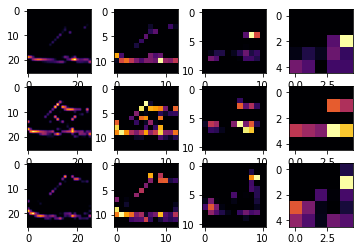

In [31]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 31

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

print(layer_outputs)
print(activation_model)
print(model.input)
print(len(activation_model.predict(tf.reshape(test_images[FIRST_IMAGE], (-1, 28, 28, 1)))))

for x in range(0,4):
  f1 = activation_model.predict(tf.reshape(test_images[FIRST_IMAGE], (-1, 28, 28, 1)))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  
  f2 = activation_model.predict(tf.reshape(test_images[SECOND_IMAGE], (-1, 28, 28, 1)))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  
  f3 = activation_model.predict(tf.reshape(test_images[THIRD_IMAGE], (-1, 28, 28, 1)))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)